<a href="https://colab.research.google.com/github/Lipun101/EV_Indian_Market_Segmentation/blob/main/Segmentation_of_Indian_EV_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Market Segmentation of Indian EV Market**

**Exploratory Data Analysis to identify general patterns in this EV Dataset**

In [ ]:
# Adding the dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from pandas.plotting import parallel_coordinates
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import adjusted_rand_score
import networkx as nx
from sklearn.mixture import GaussianMixture
import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split


In [ ]:
# Reading the datasets

data1 = pd.read_csv("/content/drive/MyDrive/Dataset_ev_Indian.csv")
data1.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,Price(Inr)
0,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,2682900.00
1,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,5047429.20
2,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,6084817.20
3,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,2950921.71
4,Lucid,Air,2.8,250,610,180,620,Yes,AWD,Type 2 CCS,Sedan,F,5,9390150.00


**Analysing the datasets**

In [ ]:
# Checking the shape of the datasets (number of rows and columns)

print("shape of data1: ", data1.shape)

shape of data1:  (90, 14)


In [ ]:
# checking the basic informations of the datasets

print("---------------------------------data1 infotrmation------------------------------------")
print(data1.info())
print("---------------------------------------------------------------------------------------")

---------------------------------data1 infotrmation------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            90 non-null     object 
 1   Model            90 non-null     object 
 2   AccelSec         90 non-null     float64
 3   TopSpeed_KmH     90 non-null     int64  
 4   Range_Km         90 non-null     int64  
 5   Efficiency_WhKm  90 non-null     int64  
 6   FastCharge_KmH   90 non-null     int64  
 7   RapidCharge      90 non-null     object 
 8   PowerTrain       90 non-null     object 
 9   PlugType         90 non-null     object 
 10  BodyStyle        90 non-null     object 
 11  Segment          90 non-null     object 
 12  Seats            90 non-null     int64  
 13  Price(Inr)       90 non-null     float64
dtypes: float64(2), int64(5), object(7)
memory usage: 10.0+ KB
None
-----

In [ ]:
# Checking for the statistics of the datasets

print("stats of dataset1")
print("-----------------------------------------------------------------------------")
print(data1.describe())
print("-----------------------------------------------------------------------------")


stats of dataset1
-----------------------------------------------------------------------------
        AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm  FastCharge_KmH  \
count  90.000000     90.000000   90.000000        90.000000       90.000000   
mean    7.873333    169.766667  315.388889       187.400000      403.000000   
std     2.889609     32.265420   98.833726        27.767817      172.811842   
min     2.800000    123.000000   95.000000       104.000000      170.000000   
25%     6.050000    150.000000  250.000000       168.000000      232.500000   
50%     7.550000    160.000000  330.000000       180.000000      390.000000   
75%     9.375000    187.500000  383.750000       199.500000      517.500000   
max    22.400000    260.000000  610.000000       273.000000      890.000000   

           Seats    Price(Inr)  
count  90.000000  9.000000e+01  
mean    4.755556  4.675252e+06  
std     0.675596  2.784081e+06  
min     2.000000  1.800136e+06  
25%     5.000000  2.989399e

**Analysis of EVs based on Body Style**

<ipython-input-6-de30ee7f247b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = data1['BodyStyle'].value_counts().index,


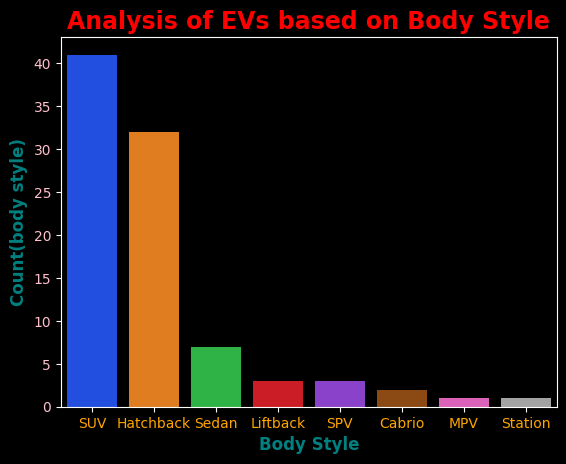

In [ ]:
plt.style.use('dark_background')
sns.barplot(x = data1['BodyStyle'].value_counts().index,
            y = data1['BodyStyle'].value_counts(),
            palette = 'bright')
plt.title("Analysis of EVs based on Body Style", color = 'red', weight = "bold", fontsize = 17)
plt.xlabel("Body Style", color = 'teal', weight = "bold", fontsize = 12)
plt.xticks(color = 'orange')
plt.ylabel("Count(body style)", color = 'teal', weight = "bold", fontsize = 12)
plt.yticks(color = 'pink')
plt.show()

SUVs and Hatchbacks dominates in the EV Market while MPV and Station seems to have very low EVs in the market.

**Analysis of EVs based on Brands**

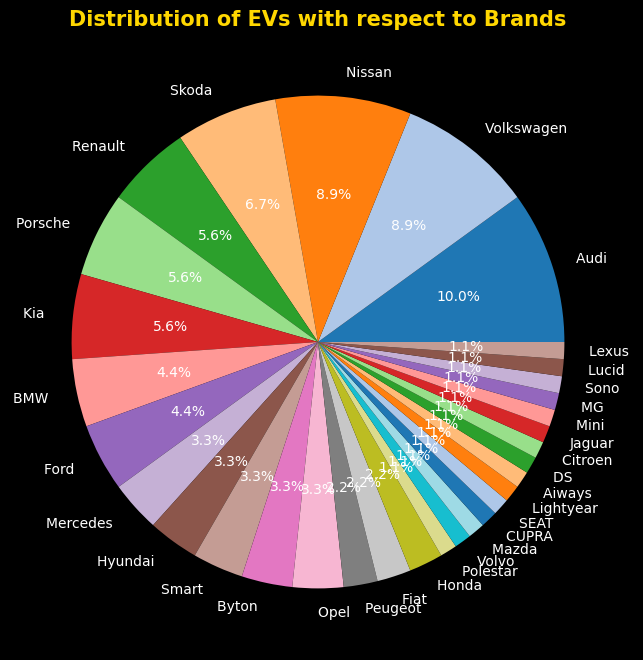

In [ ]:
brand_counts = data1['Brand'].value_counts()

cmap = plt.get_cmap('tab20')  # 'tab10' is an colormap
colors = cmap.colors[:len(brand_counts)]

plt.figure(figsize=(8, 8))
plt.pie(brand_counts, labels=brand_counts.index, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of EVs with respect to Brands', color = 'gold', weight = "bold", fontsize = 15)
plt.show()


After analysing the EVs based on Brands, we can see that Audi, Volkswagen and  Nissan have more number of EV vehicles in the market.

**Analysis of EVs based on Segments**

Segment
C    30
B    22
D    10
E    10
F     8
A     7
N     3
Name: count, dtype: int64


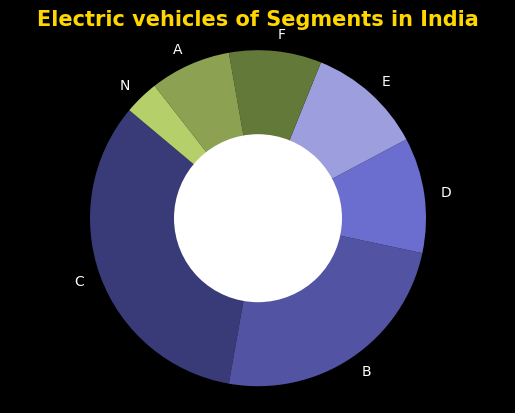

In [ ]:
segments_counts = data1['Segment'].value_counts()
print(segments_counts)
cmap = plt.get_cmap('tab20b')
colors = cmap.colors[:len(segments_counts)]
plt.pie(segments_counts, labels=segments_counts.index, colors=colors, startangle=140)

centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Electric vehicles of Segments in India', color = 'gold', weight = "bold", fontsize = 15)
plt.axis('equal')
plt.show()

Electric vehicles in Segment C dominating here and segment N have lowest number of EV cars

**Analysis of EVs based on Seats.**

Seats
5    66
4    20
7     2
2     2
Name: count, dtype: int64


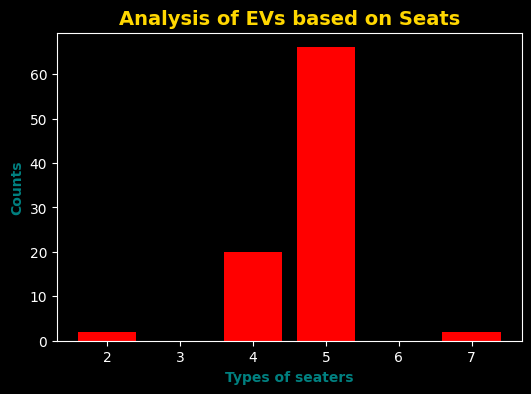

In [ ]:
seat_counts = data1['Seats'].value_counts()
print(seat_counts)
plt.figure(figsize= (6,4))
plt.bar(data1['Seats'].value_counts().index, data1['Seats'].value_counts(), color = 'red')
plt.title("Analysis of EVs based on Seats", color = 'gold', weight = "bold", fontsize = 14)
plt.xlabel("Types of seaters", color = 'teal', weight = "bold", fontsize = 10)
plt.ylabel("Counts", color = 'teal', weight = "bold", fontsize = 10)
plt.show()

We can see that 5 Seaters are more in the market where as 2 aand 7 Seaters numbers are less.

**Which brand have how many number of seaters available.**

Seats        2  4  5  7
Brand                  
Aiways       0  0  1  0
Audi         0  1  8  0
BMW          0  2  2  0
Byton        0  0  3  0
CUPRA        0  1  0  0
Citroen      0  0  1  0
DS           0  0  1  0
Fiat         0  2  0  0
Ford         0  0  4  0
Honda        0  2  0  0
Hyundai      0  0  3  0
Jaguar       0  0  1  0
Kia          0  0  5  0
Lexus        0  0  1  0
Lightyear    0  0  1  0
Lucid        0  0  1  0
MG           0  0  1  0
Mazda        0  0  1  0
Mercedes     0  0  2  1
Mini         0  1  0  0
Nissan       0  0  7  1
Opel         0  0  3  0
Peugeot      0  0  2  0
Polestar     0  0  1  0
Porsche      0  5  0  0
Renault      0  1  4  0
SEAT         0  1  0  0
Skoda        0  1  5  0
Smart        2  1  0  0
Sono         0  0  1  0
Volkswagen   0  2  6  0
Volvo        0  0  1  0


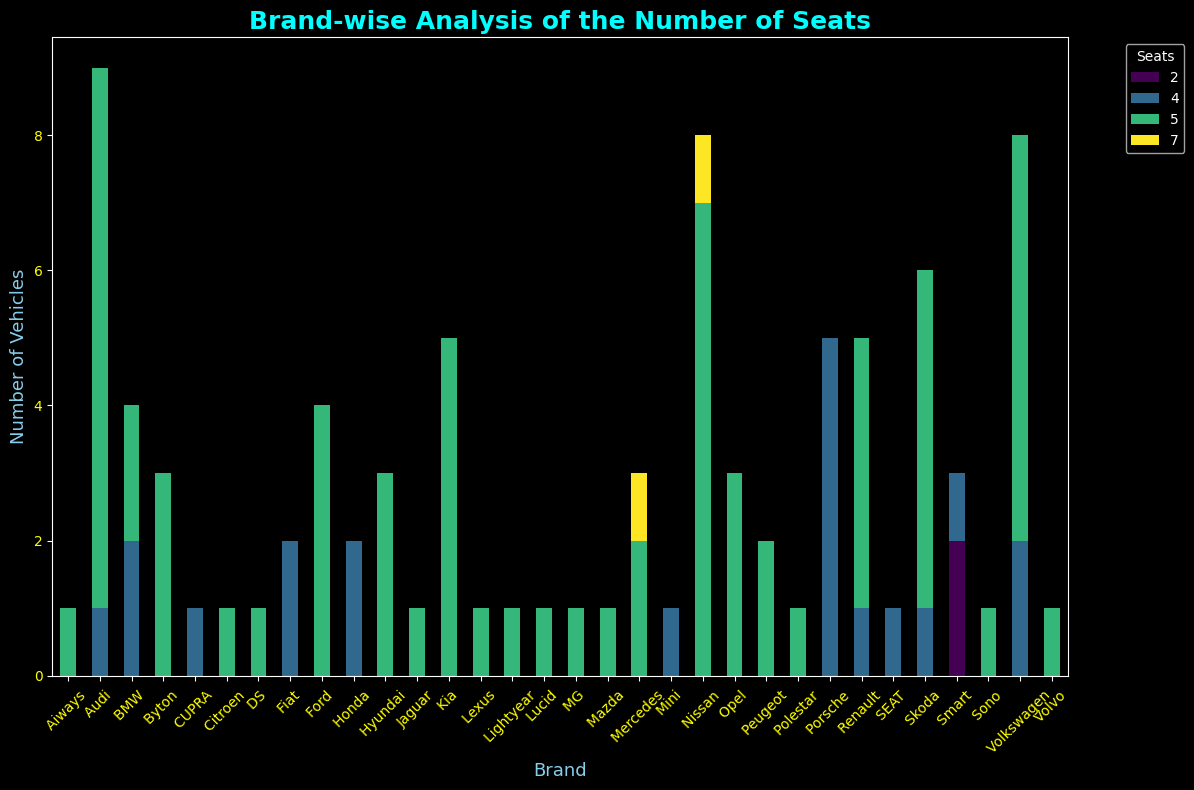

In [ ]:
# seat_per_brand = data1.groupby('Brand')['Seats'].sum().reset_index()
seats_by_brand = data1.groupby(['Brand', 'Seats']).size().unstack(fill_value=0)
print(seats_by_brand)

seats_by_brand.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.xlabel('Brand', color = 'skyblue', fontsize = 13)
plt.xticks(color = 'yellow')
plt.ylabel('Number of Vehicles', color = 'skyblue', fontsize = 13)
plt.yticks(color = 'yellow')
plt.title('Brand-wise Analysis of the Number of Seats', color = 'cyan', weight = "bold", fontsize = 18)
plt.xticks(rotation=45)
plt.legend(title='Seats', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

Five seaters are vehicles are more roaming as compared to other range of seatres in the market.

**Analysis of EVs accoding to acceleration per second**

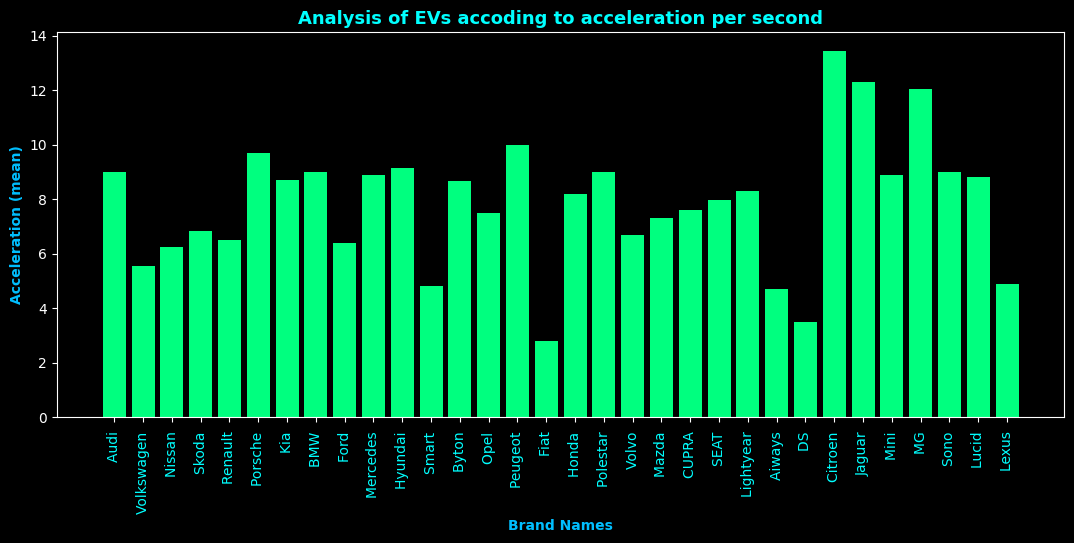

In [ ]:
data1.groupby('Brand')['AccelSec'].mean()
plt.figure(figsize = (13,5))
plt.title("Analysis of EVs accoding to acceleration per second", color = 'cyan', weight = "bold", fontsize = 13)
plt.bar(data1['Brand'].value_counts().index, data1.groupby('Brand')['AccelSec'].mean(), color = 'springgreen')
plt.xlabel("Brand Names", color = 'deepskyblue', weight = "bold", fontsize = 10)
plt.ylabel("Acceleration (mean)", color = 'deepskyblue', weight = "bold", fontsize = 10)
plt.xticks(rotation = 90, color = 'cyan')
plt.show()

**Price analysis as per the Brands**

<ipython-input-12-4ef6e704e761>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Brand', y = 'Price(Inr)', data = brand_price_stats, palette = 'viridis')


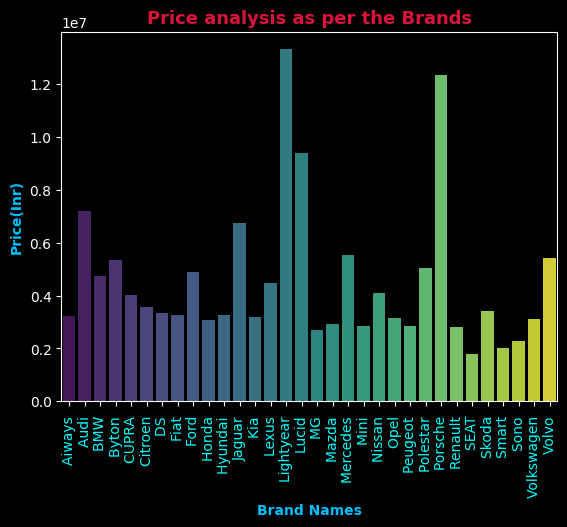

In [ ]:
# data1.groupby('Brand')['Price(Inr)'].mean()

brand_price_stats = data1.groupby('Brand')['Price(Inr)'].mean().reset_index()
# print(" average price of evs: ")
# print(brand_price_stats)
plt.title("Price analysis as per the Brands", color = 'crimson', weight = "bold", fontsize = 13)
sns.barplot(x = 'Brand', y = 'Price(Inr)', data = brand_price_stats, palette = 'viridis')
plt.xlabel("Brand Names", color = 'deepskyblue', weight = "bold", fontsize = 10)
plt.xticks(rotation = 90, color = 'cyan')
plt.ylabel("Price(Inr)", color = 'deepskyblue', weight = "bold", fontsize = 10)
plt.show()

**Average Topspeed, Range, and Efficiency with respect to Brands**

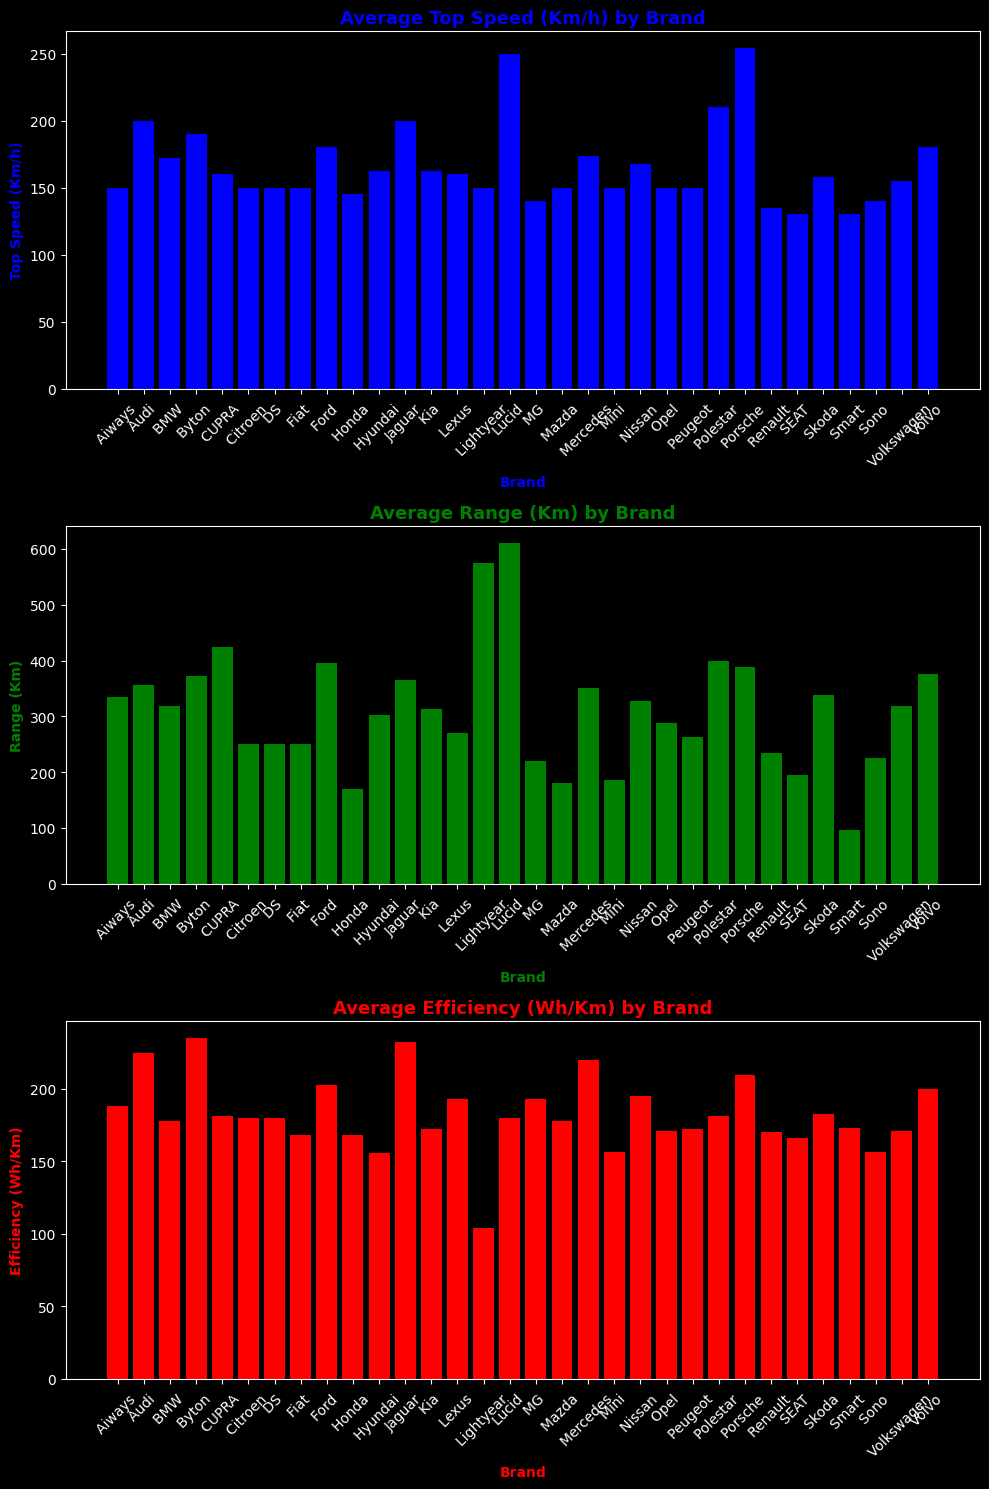

In [ ]:
brand_stats = data1.groupby('Brand').agg({
    'TopSpeed_KmH': 'mean',
    'Range_Km': 'mean',
    'Efficiency_WhKm': 'mean'
}).reset_index()

# print(brand_stats)

fig, ax = plt.subplots(3, 1, figsize=(10, 15))

ax[0].bar(brand_stats['Brand'], brand_stats['TopSpeed_KmH'], color='blue')
ax[0].set_title('Average Top Speed (Km/h) by Brand', color = 'blue', weight = 'bold', fontsize = 13)
ax[0].set_xlabel('Brand', color = 'blue', weight = 'bold')
ax[0].set_ylabel('Top Speed (Km/h)', color = 'blue', weight = 'bold')
ax[0].tick_params(axis='x', rotation=45)

ax[1].bar(brand_stats['Brand'], brand_stats['Range_Km'], color='green')
ax[1].set_title('Average Range (Km) by Brand', color = 'green', weight = 'bold', fontsize = 13)
ax[1].set_xlabel('Brand', color = 'green', weight = 'bold')
ax[1].set_ylabel('Range (Km)', color = 'green', weight = 'bold')
ax[1].tick_params(axis='x', rotation=45)

ax[2].bar(brand_stats['Brand'], brand_stats['Efficiency_WhKm'], color='red')
ax[2].set_title('Average Efficiency (Wh/Km) by Brand', color = 'red', weight = 'bold', fontsize = 13)
ax[2].set_xlabel('Brand', color = 'red', weight = 'bold')
ax[2].set_ylabel('Efficiency (Wh/Km)', color = 'red', weight = 'bold')
ax[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# **Principal Component Analysis**

**Explained Variance Ratio of both the components(PCA 1, PCA 2)**

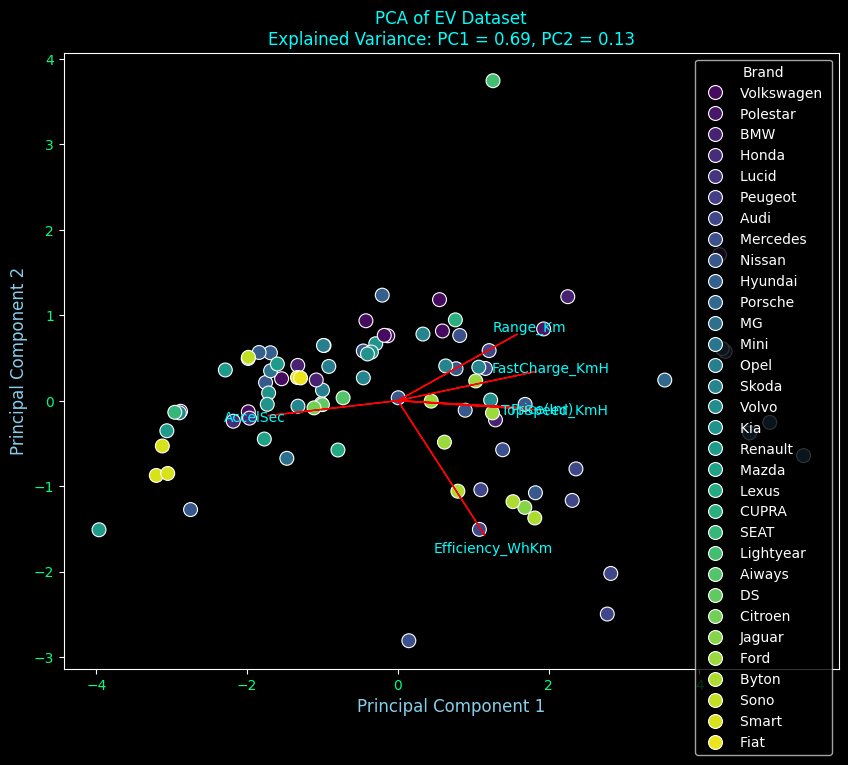

In [ ]:
'''Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms the original variables into
new, uncorrelated variables (principal components) that capture the most variability in the data.'''

numeric_cols = ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'Price(Inr)', 'FastCharge_KmH']

# standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data1[numeric_cols])

# perform pca
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(data_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Brand'] = data1['Brand']

explained_variance =  pca.explained_variance_ratio_

plt.style.use('dark_background')
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Brand', data=pca_df, palette='viridis', s=100)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
for i, col in enumerate(numeric_cols):
    scaling_factor = 2
    plt.arrow(0, 0, scaling_factor * loadings[i, 0], scaling_factor * loadings[i, 1], color='r', alpha=1)
    plt.text(loadings[i, 0] * 2.2, loadings[i, 1] * 2.2, col, color='cyan', ha='center', va='center')

plt.title(f'PCA of EV Dataset\nExplained Variance: PC1 = {explained_variance[0]:.2f}, PC2 = {explained_variance[1]:.2f}', color = 'cyan')
plt.xlabel('Principal Component 1', color = 'skyblue', fontsize = 12)
plt.xticks(color = 'springgreen')
plt.ylabel('Principal Component 2', color = 'skyblue', fontsize = 12)
plt.yticks(color = 'springgreen')
plt.legend(title='Brand', loc='best')
# plt.grid(True)
plt.show()


**Creating PCA components using Rotation Matrix**

In [ ]:
pca = PCA()
pca.fit(data_scaled)

# Rotational matrix
rotation_matrix = pca.components_
rotation_matrix_df=pd.DataFrame(rotation_matrix, columns=numeric_cols)

rotation_matrix_df.index = [f'PC{i+1}' for i in range(len(rotation_matrix))]
print("Rotation matrix of pca components --->")
print("-------------------------------------------------------------")
print(rotation_matrix_df)
print("-------------------------------------------------------------")


Rotation matrix of pca components --->
-------------------------------------------------------------
     AccelSec  TopSpeed_KmH  Range_Km  Efficiency_WhKm  Price(Inr)  \
PC1 -0.420148      0.461459  0.386692         0.280908    0.424736   
PC2 -0.097291     -0.060689  0.432326        -0.872601   -0.047998   
PC3  0.368892      0.233048 -0.497686        -0.319176    0.670963   
PC4  0.710709     -0.283535  0.545141         0.232667    0.200308   
PC5 -0.197591     -0.047859  0.302330        -0.026861    0.456723   
PC6  0.365759      0.803976  0.165198        -0.054128   -0.344071   

     FastCharge_KmH  
PC1        0.449100  
PC2        0.190289  
PC3        0.099255  
PC4        0.151871  
PC5       -0.811139  
PC6       -0.266903  
-------------------------------------------------------------


**Elbow Method for Optimal Number of Clusters**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

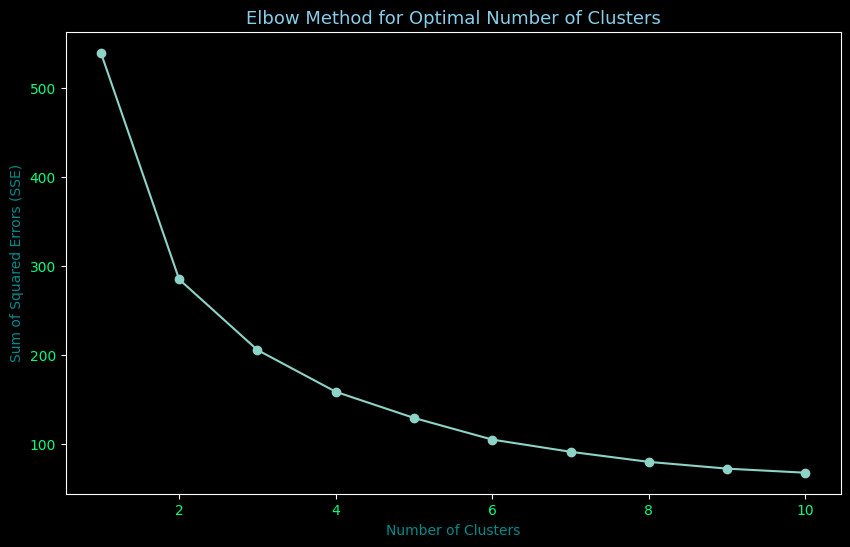

In [ ]:
# Determine the optimal number of clusters using the elbow method
# Calculating the Kmeans of the clusters

sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters', color = 'darkcyan', fontsize = 10)
plt.xticks(color = 'springgreen')
plt.ylabel('Sum of Squared Errors (SSE)', color = 'darkcyan', fontsize = 10)
plt.yticks(color = 'springgreen')
plt.title('Elbow Method for Optimal Number of Clusters', color = 'skyblue', fontsize = 13)
plt.show()

**Global stability of k-means segmentation solutions**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

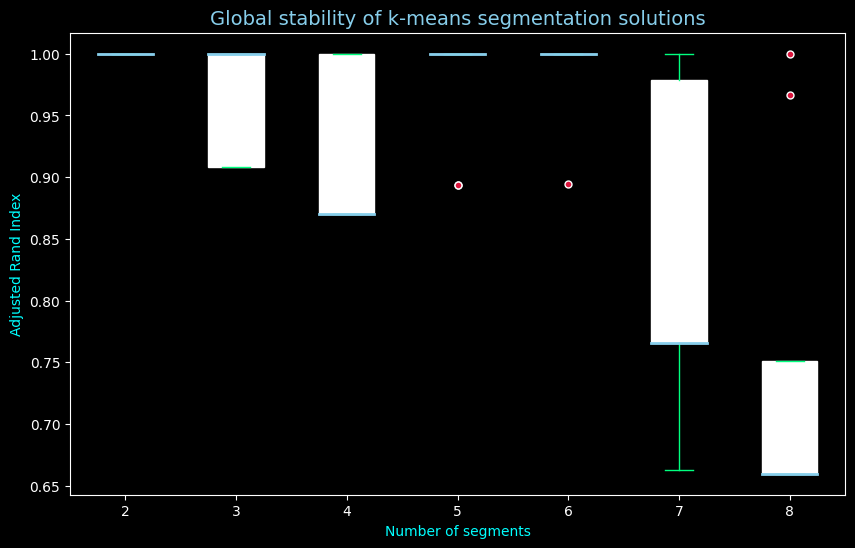

In [ ]:
# Scaling the numeric columns in your dataset using the StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data1[numeric_cols])

# Parameters
# Number of k-means runs to assess stability
n_runs = 10
# Range of clusters to test
cluster_range = range(2, 9)
# Random state for reproducibility
random_state = 42

# Store ARI scores for each number of clusters
ari_scores_dict = {k: [] for k in cluster_range}

# Run k-means for different number of clusters
for k in cluster_range:
    for i in range(n_runs):
        kmeans = KMeans(n_clusters=k, random_state=random_state + i)
        labels = kmeans.fit_predict(data_scaled)

        if i == 0:
            reference_labels = labels
        else:
            ari = adjusted_rand_score(reference_labels, labels)
            ari_scores_dict[k].append(ari)

# Convert ARI scores to a DataFrame for box plotting
ari_scores_df = pd.DataFrame({k: scores for k, scores in ari_scores_dict.items()})

# Create the box plot with customized median line and no grid
fig, ax = plt.subplots(figsize=(10, 6))

# Create the box plot with customized properties
boxplot = ari_scores_df.boxplot(
    ax=ax,
    patch_artist=True,
    boxprops=dict(facecolor='white', color='white'),
    medianprops=dict(color='skyblue', linewidth=2),
    whiskerprops=dict(color='springgreen'),
    capprops=dict(color='springgreen'),
    flierprops=dict(markerfacecolor='crimson', marker='o', markersize=5, linestyle='none'),
)
# Set labels and title
ax.set_xlabel('Number of segments', color = 'cyan', fontsize = 10)
ax.set_ylabel('Adjusted Rand Index', color = 'cyan', fontsize = 10)
ax.set_title('Global stability of k-means segmentation solutions', color = 'skyblue', fontsize = 14)

# Turn off grid lines
ax.grid(False)
# Remove the default background
ax.set_facecolor('black')
# Show the plot
plt.show()

**KMeans Clustering Results using the Pair plot**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

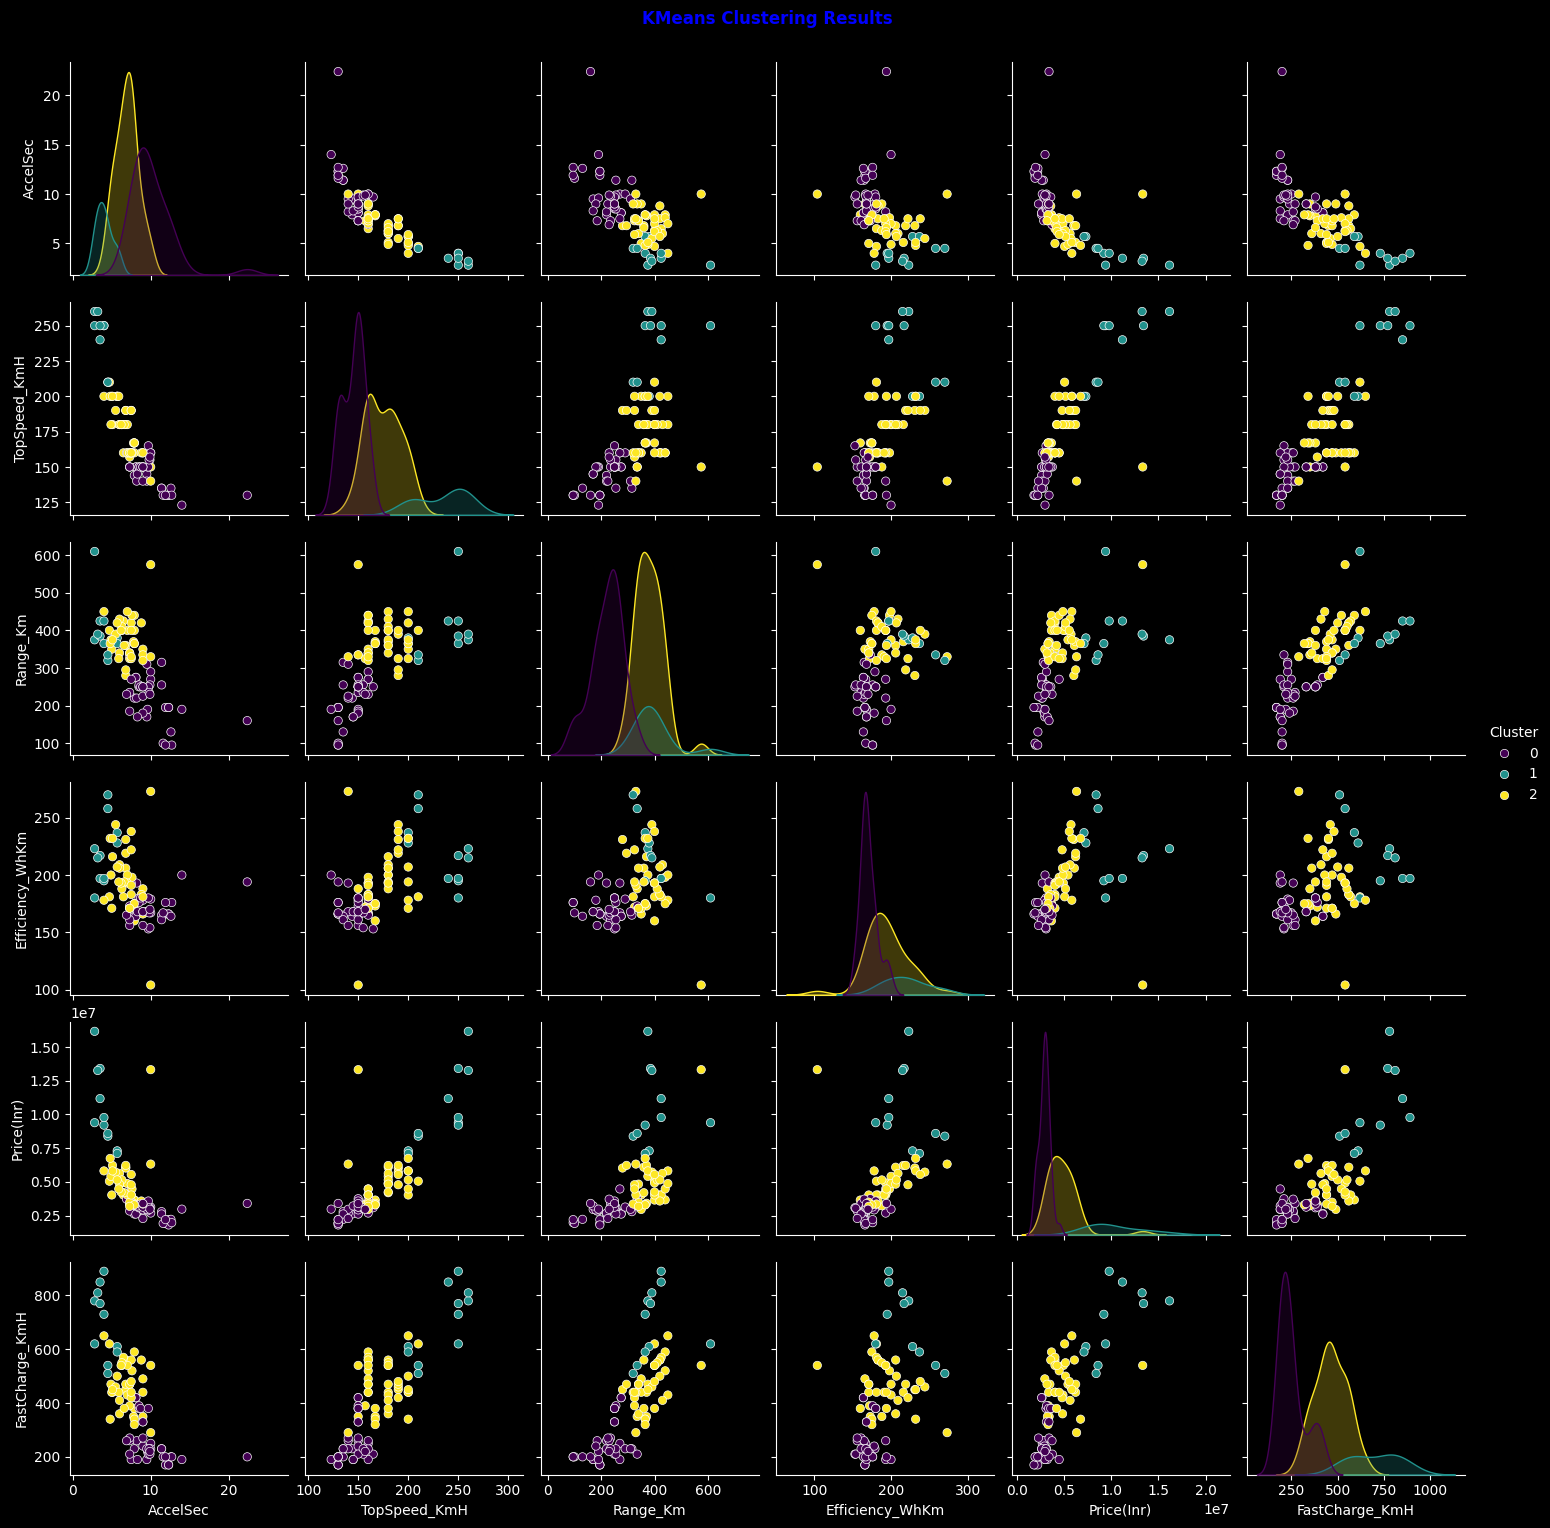

In [ ]:
# Perform KMeans clustering with the optimal number of clusters (k=3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster labels to the original data
data1['Cluster'] = clusters

# Pair plot
plt.figure(figsize=(10, 6))
sns.pairplot(data1, vars=numeric_cols, hue='Cluster', palette='viridis', diag_kind='auto')
plt.suptitle('KMeans Clustering Results', y=1.02, color = 'blue', weight = 'bold')
plt.show()

**Parallel Coordinates Plot of KMeans Clustering with 5 Segments**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


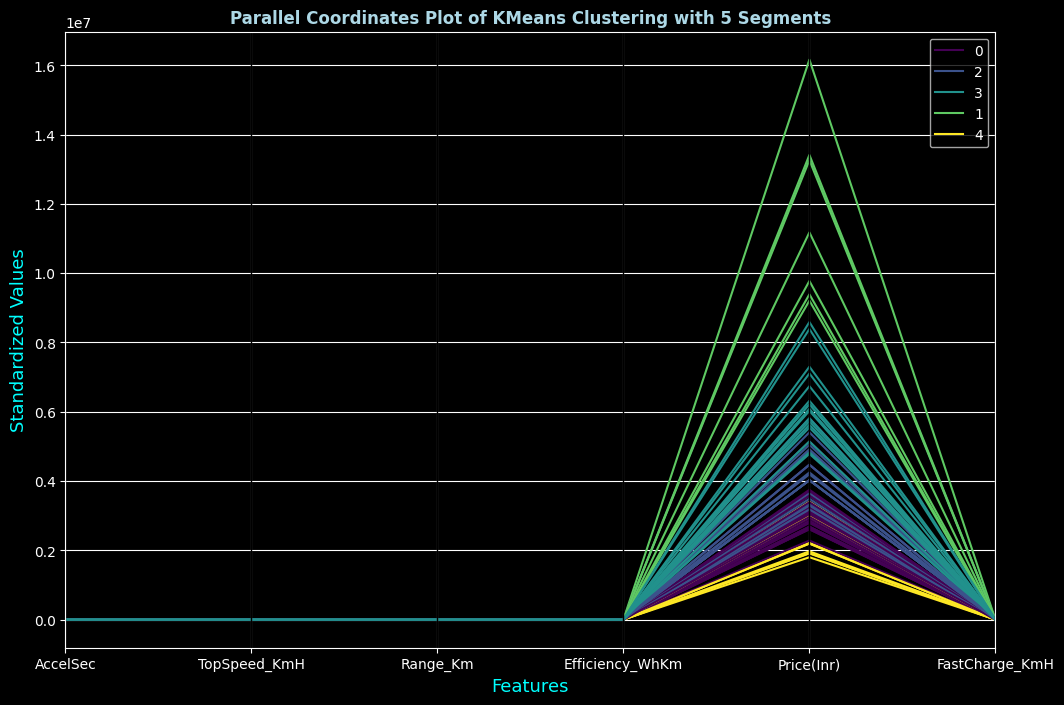

In [ ]:
from pandas.plotting import parallel_coordinates

# Perform KMeans clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster labels to the original data
data1['Cluster'] = clusters

# Create a parallel coordinates plot
plt.figure(figsize=(12, 8))
parallel_coordinates(data1[numeric_cols + ['Cluster']], 'Cluster', colormap='viridis')
plt.title('Parallel Coordinates Plot of KMeans Clustering with 5 Segments', color = 'lightblue', weight = 'bold')
plt.xlabel('Features', color = 'cyan', fontsize = 13)
plt.ylabel('Standardized Values', color = 'cyan', fontsize = 13)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

**Gorge plot of the four-segment k-means solution**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.3707337014224689
silhouette Values --------->
------------------------------------------------------------------------
[ 0.46603234  0.14028157  0.07216733  0.59190559  0.29613985  0.59510724
  0.14400882  0.26249127  0.32620391  0.52089583  0.35554828  0.15212527
  0.46525525  0.46413947  0.52570465  0.57397314  0.42135683  0.46554246
  0.14536906  0.37956407  0.59886414  0.46619886  0.28806027 -0.02750649
  0.41379784  0.29057557  0.43371343  0.33054349  0.41066813  0.55423031
  0.20512528  0.21543446  0.44984708  0.39567343  0.29816596  0.50796708
  0.42398345  0.56689963  0.56345283  0.29651241  0.11366782  0.41344178
  0.13424346  0.02464798  0.48581039  0.27128145  0.44910252  0.55021407
  0.29551554  0.55045082  0.33214124  0.53555888  0.31223454  0.45441595
  0.14675372  0.55261458  0.43331923  0.25664792  0.08348398  0.3460192
  0.39242959  0.60235851  0.50416556  0.53570521  0.55838133  0.31106939
  0.5206852   0.03742952  0.63228063  0.39559125  0.5443082

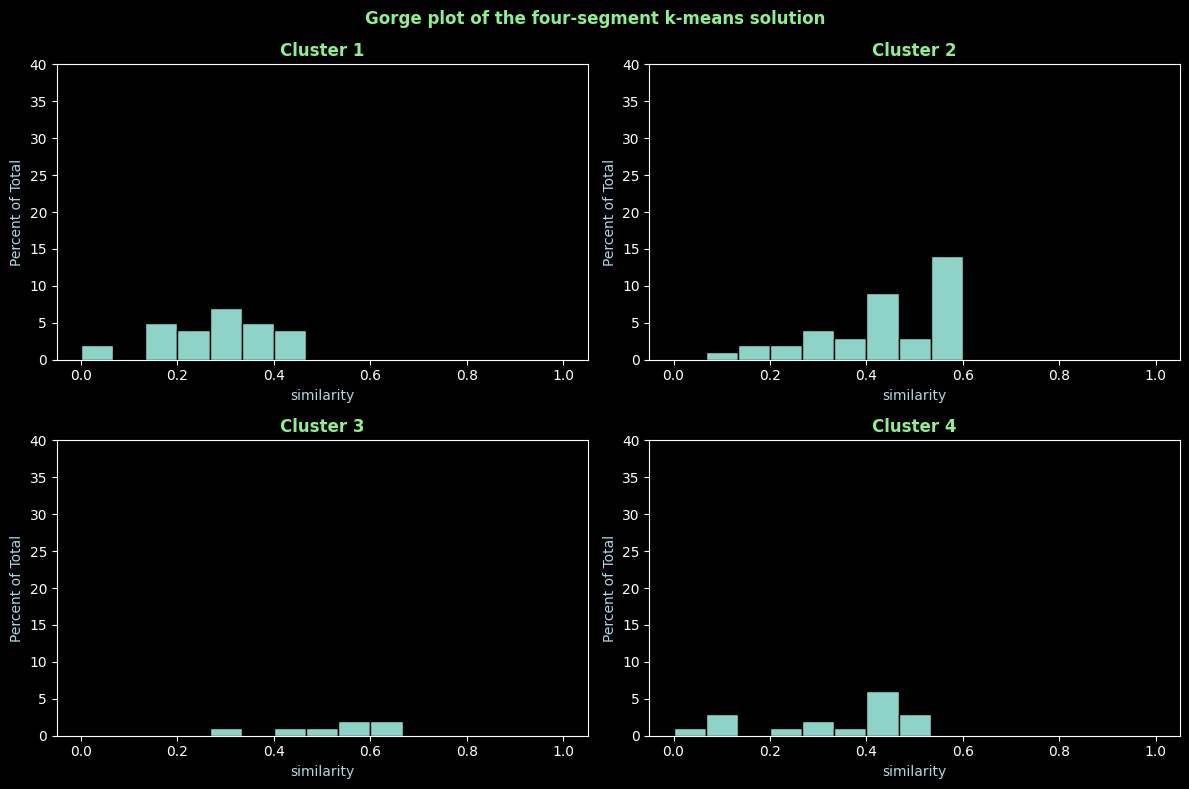

In [ ]:
X = data1[numeric_cols]

# Standardizing the features
X_scaled = scaler.fit_transform(X)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Calculate Silhouette score
score = silhouette_score(data_scaled, clusters)
print(f'Silhouette Score: {score}')

# Compute the silhouette scores for each sample
silhouette_vals = silhouette_samples(X_scaled, clusters)
print("silhouette Values --------->")
print("------------------------------------------------------------------------")
print(silhouette_vals)
print("------------------------------------------------------------------------")

# Create a DataFrame to hold the silhouette scores and cluster labels
# here we are calculating the different segments stability

silhouette_df = pd.DataFrame({
    'silhouette': silhouette_vals,
    'cluster': clusters
})


# Plotting the gorge plot
plt.figure(figsize=(12, 8))
plt.suptitle("Gorge plot of the four-segment k-means solution", color = 'lightgreen', weight = 'bold')

for i in range(n_clusters):
    plt.subplot(2, 2, i + 1)
    cluster_silhouette_vals = silhouette_df[silhouette_df['cluster'] == i]['silhouette']
    plt.hist(cluster_silhouette_vals, bins=15, range=(0, 1), edgecolor='black')
    plt.title(f'Cluster {i+1}', color = 'lightgreen', weight = 'bold')
    plt.xlabel('similarity', color = 'lightblue')
    plt.ylabel('Percent of Total', color = 'lightblue')
    plt.ylim(0, 40)  # Adjust the y-axis limit based on your data

plt.tight_layout()
plt.show()


**Segment level stability across solutions (SLSA) for 9 runs**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

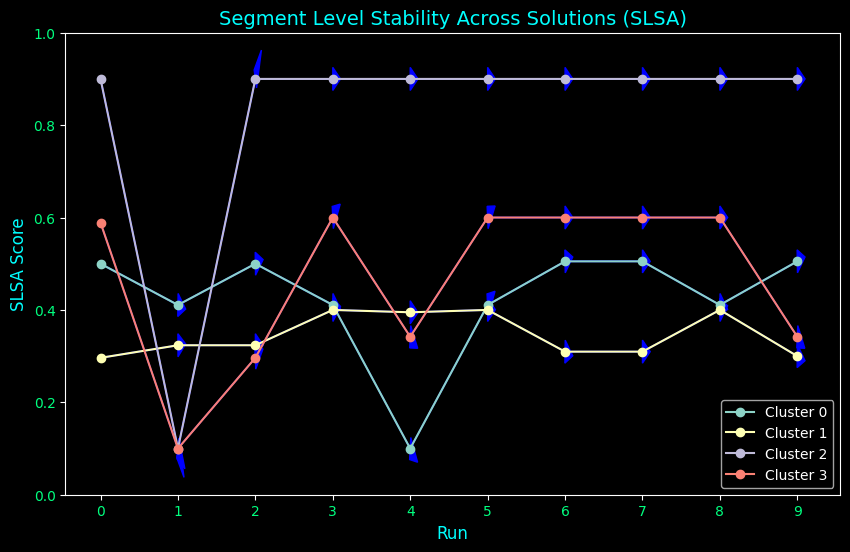

In [ ]:
#  Variable that stores the number of times a particular experiment or simulation is run.
n_runs = 10
cluster_assignments = np.zeros((X_scaled.shape[0], n_runs))

for i in range(n_runs):
    kmeans = KMeans(n_clusters=n_clusters, random_state=i)
    clusters = kmeans.fit_predict(X_scaled)
    cluster_assignments[:, i] = clusters

# Calculate the Segment Level Stability Across Solutions (SLSA)
slsa_scores = np.zeros((n_clusters, n_runs))

for i in range(n_clusters):
    cluster_stability = []
    for j in range(n_runs):
        cluster_indices = np.where(cluster_assignments[:, j] == i)[0]
        stability = []
        for k in range(n_runs):
            other_cluster_indices = np.where(cluster_assignments[:, k] == i)[0]
            common_elements = len(np.intersect1d(cluster_indices, other_cluster_indices))
            if len(cluster_indices) > 0:
                stability.append(common_elements / len(cluster_indices))
            else:
                stability.append(0)
        slsa_scores[i, j] = np.mean(stability)

plt.figure(figsize=(10, 6))

for i in range(n_clusters):
    plt.plot(range(n_runs), slsa_scores[i], marker='o', linestyle='-', label=f'Cluster {i}')
    for j in range(n_runs-1):
        plt.arrow(j, slsa_scores[i, j], 1, slsa_scores[i, j+1] - slsa_scores[i, j],
                  head_width=0.05, head_length=0.1, fc='blue', ec='blue')

plt.xlabel('Run', color = 'cyan', fontsize = 12)
plt.xticks(color = 'springgreen')
plt.ylabel('SLSA Score', color = 'cyan', fontsize = 12)
plt.yticks(color = 'springgreen')
plt.title('Segment Level Stability Across Solutions (SLSA)', color = 'cyan', fontsize = 14)
plt.legend()
plt.ylim(0, 1)
plt.xticks(range(n_runs))
plt.show()

**Segment level stability across solutions (SLSA) plot from two to eight segments.**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

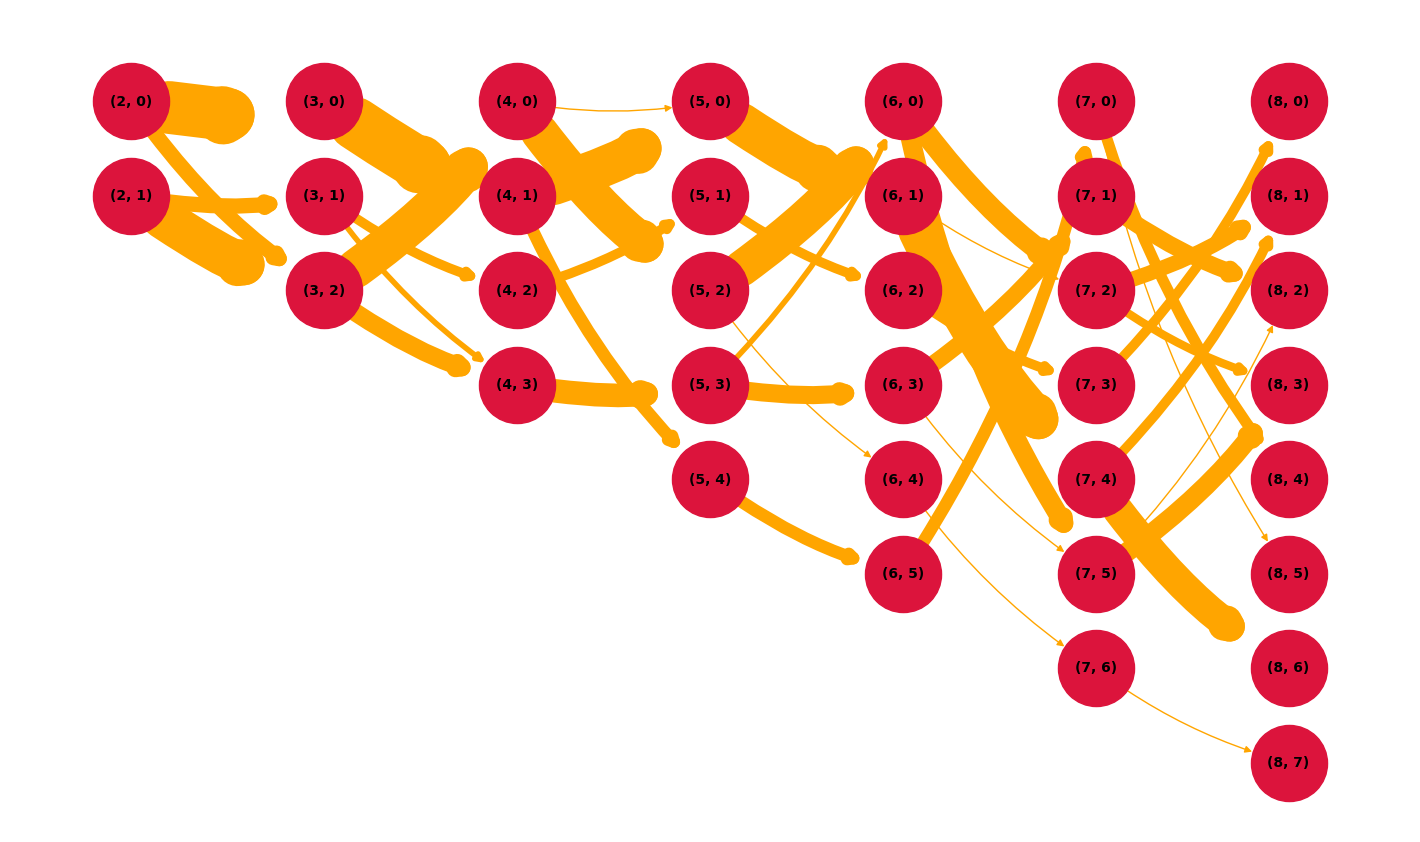

In [ ]:
# Define the range of k values to test
k_range = range(2, 9)  # Adjust the range based on the plot provided

# Initialize a list to store cluster labels
all_cluster_labels = []

# Perform k-means clustering for each value of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    all_cluster_labels.append(clusters)

# Create the graph
G = nx.DiGraph()
# Add nodes and edges with weights based on ARI scores
for i, k in enumerate(k_range[:-1]):
    labels_k = all_cluster_labels[i]
    labels_k_next = all_cluster_labels[i + 1]

    unique_labels_k = set(labels_k)
    unique_labels_k_next = set(labels_k_next)

    for label in unique_labels_k:
        G.add_node((k, label), level=k, cluster=label)

    for label in unique_labels_k_next:
        G.add_node((k + 1, label), level=k + 1, cluster=label)

    for label_k in unique_labels_k:
        for label_k_next in unique_labels_k_next:
            indices_k = [idx for idx, lbl in enumerate(labels_k) if lbl == label_k]
            indices_k_next = [idx for idx, lbl in enumerate(labels_k_next) if lbl == label_k_next]
            common_indices = set(indices_k).intersection(indices_k_next)
            weight = len(common_indices)

            if weight > 0:
                G.add_edge((k, label_k), (k + 1, label_k_next), weight=weight)
# Drawing th plot
pos = {}
for node in G.nodes():
    pos[node] = (node[0], -node[1])

edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]

plt.figure(figsize=(14, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='crimson', font_size=10, font_weight='bold', width=weights, edge_color='orange', connectionstyle='arc3,rad=0.1')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.show()


**Segment level Stability within solutions for the four segment solution.**



<ipython-input-23-d2e0720e54a7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='silhouette', data=silhouette_df, palette="Spectral")


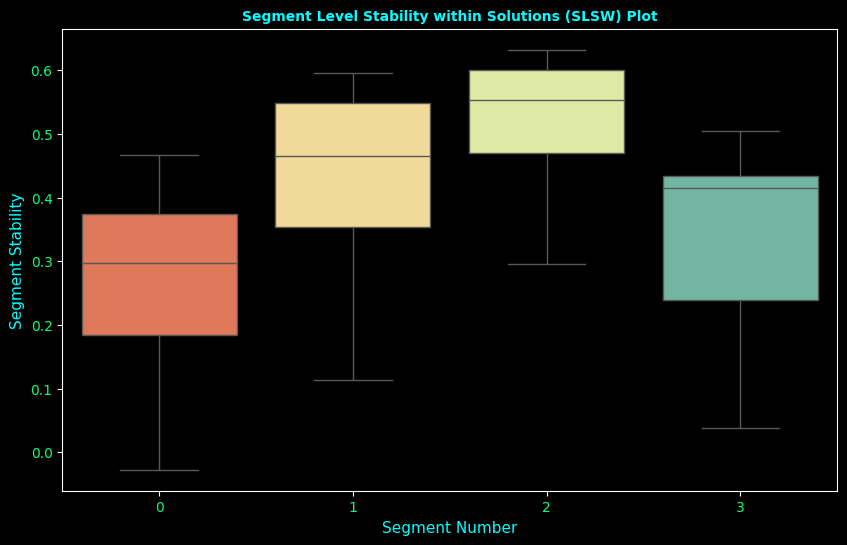

In [ ]:
# Plotting the SLSW plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='silhouette', data=silhouette_df, palette="Spectral")
plt.title('Segment Level Stability within Solutions (SLSW) Plot', color = 'cyan', weight = 'bold', fontsize = 10)
plt.xlabel('Segment Number', color = 'cyan', fontsize = 11)
plt.xticks(color = 'springgreen')
plt.ylabel('Segment Stability', color = 'cyan', fontsize = 11)
plt.yticks(color = 'springgreen')
plt.show()

**Mixtures of Distributions**

**Information criteria for the mixture models **

Criteria used to evaluate and compare the performance of Gaussian Mixture Models (GMMs) and other clustering models ----->
--------------------------------------------------------------------------------------------------------------------------
   k    logLik         AIC          BIC          ICL
0  2 -4.279855  880.268350  1017.757882  1025.852573
1  3 -3.794817  849.047009  1056.531212  1063.144139
2  4 -2.950396  753.050600  1030.529473  1036.520731
3  5 -1.798403  601.712327   949.185871   950.322990
4  6 -1.798461  657.722898  1075.191113  1077.805674
5  7 -1.065351  581.762546  1069.225432  1070.423212
6  8  0.241660  402.486640   959.944197   965.424898
--------------------------------------------------------------------------------------------------------------------------


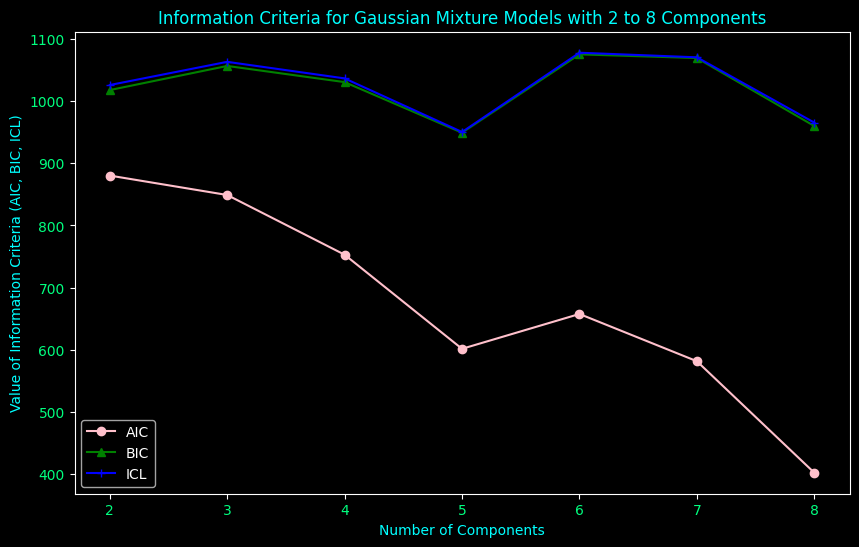

In [ ]:
# GaussianMixture is a class that implements the Gaussian Mixture Model (GMM) algorithm,
# - Density estimation, Clustering and Dimensionality reduction

k_range = range(2, 9)
metrics = []
log_likelihoods = []
aics = []
bics = []
icls = []

# Function to compute entropy
def compute_entropy(resp):
    return -np.sum(resp * np.log(resp + 1e-10))

# Model-based clustering for each value of k
for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_scaled)
    log_likelihood = gmm.lower_bound_
    aic = gmm.aic(X_scaled)
    bic = gmm.bic(X_scaled)

    # Compute responsibilities (posterior probabilities)
    responsibilities = gmm.predict_proba(X_scaled)

    entropy = compute_entropy(responsibilities)
    icl = bic + 2 * entropy

    log_likelihoods.append(log_likelihood)
    aics.append(aic)
    bics.append(bic)
    icls.append(icl)
    metrics.append([k, log_likelihood, aic, bic, icl])
# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics, columns=['k', 'logLik', 'AIC', 'BIC', 'ICL'])
print("Criteria used to evaluate and compare the performance of Gaussian Mixture Models (GMMs) and other clustering models ----->")
print("--------------------------------------------------------------------------------------------------------------------------")
print(metrics_df)
print("--------------------------------------------------------------------------------------------------------------------------")

# Plot the information criteria
plt.figure(figsize=(10, 6))
plt.plot(k_range, aics, 'o-', label='AIC', color='pink')
plt.plot(k_range, bics, '^-', label='BIC', color='green')
plt.plot(k_range, icls, '+-', label='ICL', color='blue')

# Add title and labels
plt.title('Information Criteria for Gaussian Mixture Models with 2 to 8 Components', color = 'aqua')
plt.xlabel('Number of Components', color = 'cyan')
plt.xticks(color = 'springgreen')
plt.ylabel('Value of Information Criteria (AIC, BIC, ICL)', color = 'cyan')
plt.yticks(color = 'springgreen')
plt.legend()

# Show the plot
plt.show()

**Comaprison table between the Kmeans and the Cluster mixture.**

In [ ]:
# Best number of components (k=4) from the given plot
best_k = 4
# Fitting the best Gaussian Mixture Model
best_gmm = GaussianMixture(n_components=best_k, covariance_type='full', random_state=42)
best_gmm.fit(X_scaled)
mixture_clusters = best_gmm.predict(X_scaled)

# Clustering using KMeans with k=4
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X_scaled)
kmeans_clusters = kmeans.labels_

# Create a DataFrame to compare clusters
comparison_df = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': mixture_clusters})
comparison_table = pd.crosstab(comparison_df['kmeans'], comparison_df['mixture'])

print("Cluster Comparison Table ------->")
print("---------------------------------------")
print(comparison_table)
print("---------------------------------------")

Cluster Comparison Table ------->
---------------------------------------
mixture   0   1   2  3
kmeans                
0        11   6  11  0
1        38   0   0  0
2         0   0   0  7
3         0  16   1  0
---------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Contingency table between the Gaussian Mixture Model and Kmeans.**

In [ ]:
# Creates a Gaussian Mixture Model (GMM) with 4 components(clusters) and fits it to the scaled data "X_scaled".
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Create a DataFrame to compare cluster assignments
comparison_df = pd.DataFrame({'KMeans': clusters, 'GMM': gmm_labels})

# Print the contingency table
contingency_table = pd.crosstab(comparison_df['KMeans'], comparison_df['GMM'])
print("creates a contingency table (also known as a confusion matrix) to compare the clustering results between KMeans and GMM : ----------->")
print("-----------------------------------------------------------------------------------------------------------------------------------------------")
print(contingency_table)
print("-----------------------------------------------------------------------------------------------------------------------------------------------")

creates a contingency table (also known as a confusion matrix) to compare the clustering results between KMeans and GMM : ----------->
-----------------------------------------------------------------------------------------------------------------------------------------------
GMM      0   1   2  3
KMeans               
0        0   0   0  7
1       18   0   0  0
2        0  13   0  0
3        0   9  11  0
4        8   0   0  0
5        1   0   0  0
6       22   0   0  0
7        0   0   1  0
-----------------------------------------------------------------------------------------------------------------------------------------------


**Logistic Regression Analysis**

In [ ]:
# This module provides a comprehensive interface to statistical techniques such as Regression analysis (linear, logistic, etc.)

# Prepare the data: Create a binary outcome variable
data1['HighPrice'] = (data1['Price(Inr)'] > 5000000).astype(int)
# Select the predictor variables and add a constant term for the intercept
X = data1[['Range_Km', 'Efficiency_WhKm', 'TopSpeed_KmH']]
X = sm.add_constant(X)
# The outcome variable
y = data1['HighPrice']

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Display the summary of the regression results
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.185416
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              HighPrice   No. Observations:                   90
Model:                          Logit   Df Residuals:                       86
Method:                           MLE   Df Model:                            3
Date:                Wed, 19 Jun 2024   Pseudo R-squ.:                  0.6965
Time:                        10:17:30   Log-Likelihood:                -16.687
converged:                       True   LL-Null:                       -54.978
Covariance Type:            nonrobust   LLR p-value:                 1.661e-16
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -37.2324     10.863     -3.427      0.001     -58.524     -15.941
Range_Km     

**Plot showing 'Logistic Regression Coefficients'**

<ipython-input-28-8c07ea17a9fd>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y=coef_df.index, data=coef_df, palette='viridis', orient='h')


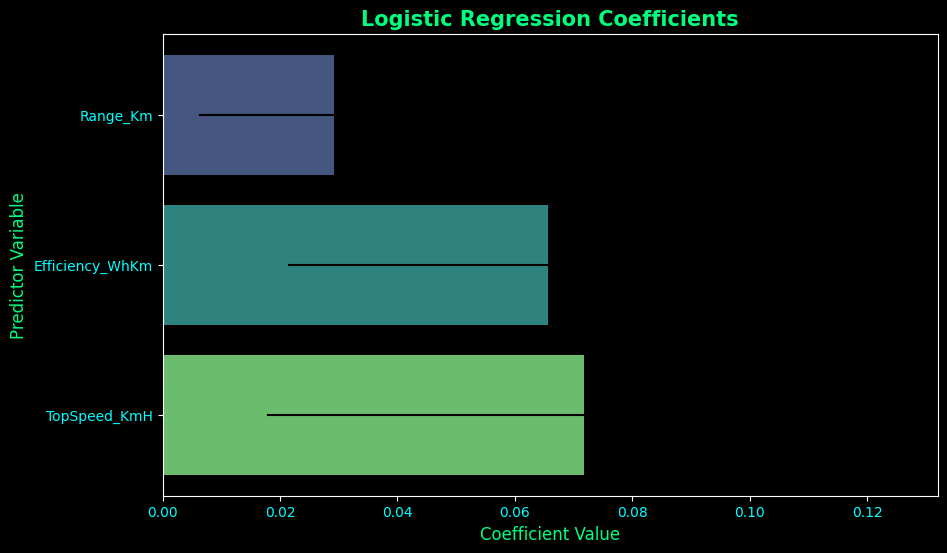

In [ ]:
# Extract the coefficients and their corresponding variable names
coefficients = result.params
conf = result.conf_int()
conf['Coefficient'] = coefficients
conf.columns = ['Lower CI', 'Upper CI', 'Coefficient']

# Filter out only the variables of interest (excluding the constant term)
variables_of_interest = ['Range_Km', 'Efficiency_WhKm', 'TopSpeed_KmH']
coef_df = conf.loc[variables_of_interest]

# Create a bar plot for the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y=coef_df.index, data=coef_df, palette='viridis', orient='h')

# Add error bars
for i in range(coef_df.shape[0]):
    plt.plot([coef_df['Lower CI'][i], coef_df['Upper CI'][i]], [i, i], color='black')

plt.axvline(x=0, color='grey', linestyle='--')
plt.title('Logistic Regression Coefficients', color = 'springgreen', weight = 'bold', fontsize = 15)
plt.xlabel('Coefficient Value', color = 'springgreen', fontsize = 12)
plt.xticks(color = 'cyan')
plt.ylabel('Predictor Variable', color = 'springgreen', fontsize = 12)
plt.yticks(color = 'cyan')
plt.show()

**Segment profile plot for the four-segment solution**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


 Visualizing and understanding the mean of the distinct features of each segment: ------>
------------------------------------------------------------------------------------------
          AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm  FastCharge_KmH
Cluster                                                                      
0         6.042105    190.000000  356.842105       227.473684      462.631579
1        10.205714    144.685714  216.142857       170.885714      243.142857
2         7.559259    164.259259  378.333333       177.037037      453.703704
3         3.611111    241.111111  425.000000       198.111111      746.666667
------------------------------------------------------------------------------------------


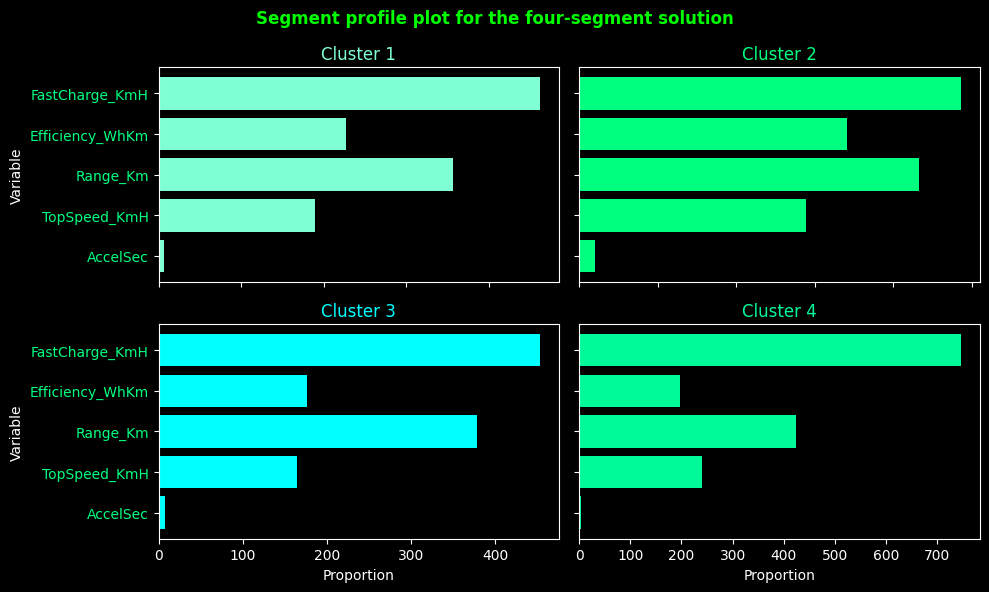

In [ ]:
# A segment profile plot is a graphical representation of the characteristics of each segment in a clustering solution.
numeric_cols = ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'FastCharge_KmH']
X = data1[numeric_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Now, let's apply K-means clustering to the scaled dataset X_scaled.
# Specify the number of clusters
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
# Perform K-means clustering
kmeans.fit(X_scaled)
# Get cluster labels
cluster_labels = kmeans.labels_
# Assign cluster labels to the original dataframe
data1['Cluster'] = cluster_labels
# After clustering, computing and examining the cluster means.
cluster_means = data1.groupby('Cluster')[numeric_cols].mean()
print(" Visualizing and understanding the mean of the distinct features of each segment: ------>")
print("------------------------------------------------------------------------------------------")
print(cluster_means)
print("------------------------------------------------------------------------------------------")
# To create a segment profile plot
# The plot would show the mean or median values of various variables (features) for each segment, allowing for a comparison across segments.
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(cluster_means.shape[1]), cluster_means.iloc[0], color = 'aquamarine')
axs[0, 0].set_title('Cluster 1', color = 'aquamarine')
axs[0, 1].barh(range(cluster_means.shape[1]), cluster_means.iloc[1], color = 'springgreen')
axs[0, 1].set_title('Cluster 2', color = 'springgreen')
axs[1, 0].barh(range(cluster_means.shape[1]), cluster_means.iloc[2], color = 'cyan')
axs[1, 0].set_title('Cluster 3', color = 'cyan')
axs[1, 1].barh(range(cluster_means.shape[1]), cluster_means.iloc[3], color = 'mediumspringgreen')
axs[1, 1].set_title('Cluster 4', color = 'mediumspringgreen')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(cluster_means.shape[1]))
    ax.set_yticklabels(X.columns, color = 'springgreen')

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment profile plot for the four-segment solution', color = 'lime', weight = 'bold')
fig.tight_layout()
plt.show()


The issue I was encountering with the Horizontal bar plots only displaying the Price(Inr) column is likely due to the scaling of the data. While plotting the means directly, the different ranges of the original data (such as Price(Inr) being much larger than other values) was causing an imbalance, thats why i removed the Price(Inr) column from the mean list.

**Segment separation plot using principal components 1 and 2**

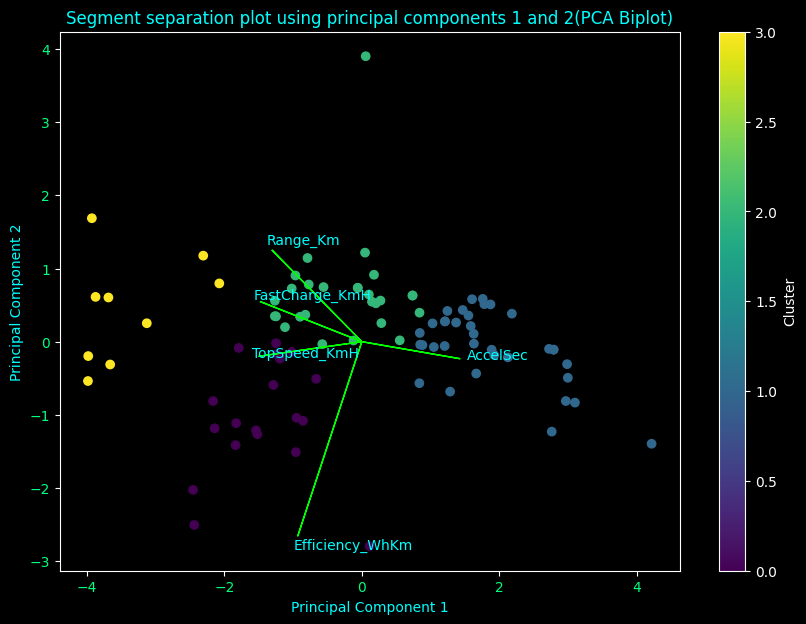

In [ ]:
''' A segment separation plot using principal components 1 and 2 is a graphical representation
that shows the separation of the segments in a 2D space defined by the first two principal components.'''
# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df = pd.concat([pca_df, data1[['Cluster']]], axis=1)

# Plot the biplot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', marker='o')

# Add annotations for loadings
for i, (varname, vector) in enumerate(zip(numeric_cols, pca.components_.T)):
    scaling_factor = 3
    plt.arrow(0, 0, scaling_factor * vector[0], scaling_factor * vector[1], color='lime', alpha=1)
    plt.text(vector[0] * 3.2, vector[1] * 3.2, varname, color='cyan')

# Add labels and title
plt.xlabel('Principal Component 1', color = 'cyan', fontsize = 10)
plt.xticks(color = 'springgreen')
plt.ylabel('Principal Component 2', color = 'cyan', fontsize = 10)
plt.yticks(color = 'springgreen')
plt.title('Segment separation plot using principal components 1 and 2(PCA Biplot)', color = 'aqua')
plt.colorbar(scatter, label='Cluster')
plt.show()

**Shaded mosaic plot for cross-tabulation of segment membership and TopSpeed_KmH**

A shaded mosaic plot is a graphical representation of the cross-tabulation of segment membership, where the shading of the rectangles represents the density or frequency of the observations in each cell.

Cross-tabulation of segment membership : ------->
----------------------------------------------------------
TopSpeed_Category  Low  Medium  High
Cluster                             
0                   17       2     0
1                   35       0     0
2                   27       0     0
3                    1       1     7
----------------------------------------------------------


<Figure size 1000x600 with 0 Axes>

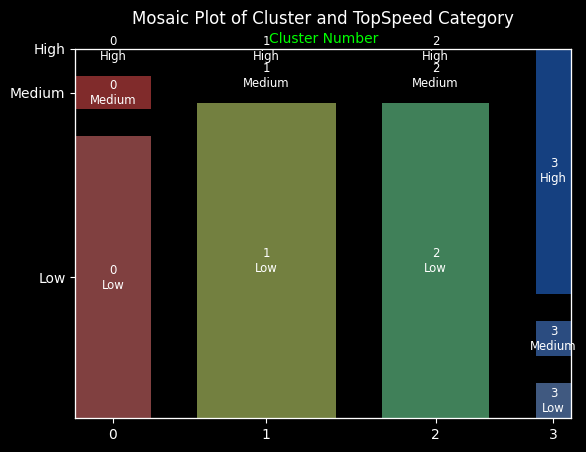

In [ ]:
# Defining bins and labels for 'TopSpeed_KmH'
bins = [0, 200, 230, 260, 300]  # example bins
labels = ['Low', 'Medium', 'High', 'Very High']

# defining ranges or bins for the top speed values and then assigning each data point to a corresponding category.
# pd.cut function from pandas to achieve this code fragment
# Creating a categorical variable
data1['TopSpeed_Category'] = pd.cut(data1['TopSpeed_KmH'], bins=bins, labels=labels)
# Displaying the updated DataFrame
# print(data1)
# Crosstabulation of Cluster and TopSpeed_Category
crosstab = pd.crosstab(data1['Cluster'], data1['TopSpeed_Category'])
print("Cross-tabulation of segment membership : ------->")
print("----------------------------------------------------------")
print(crosstab)
print("----------------------------------------------------------")
# Creating a dictionary from the crosstab for mosaic plot
crosstab_dict = crosstab.stack().reset_index().set_index(['Cluster', 'TopSpeed_Category']).to_dict()[0]

plt.figure(figsize=(10, 6))
mosaic(crosstab_dict, title='Mosaic Plot of Cluster and TopSpeed Category', gap=0.13)
plt.xlabel('Cluster Number', color = 'lime')
plt.ylabel('TopSpeed_KmH', color = 'lime')
plt.show()

**Shaded mosaic plot for cross-tabulation of segment membership and Efficiency_WhKm**

<Figure size 1000x600 with 0 Axes>

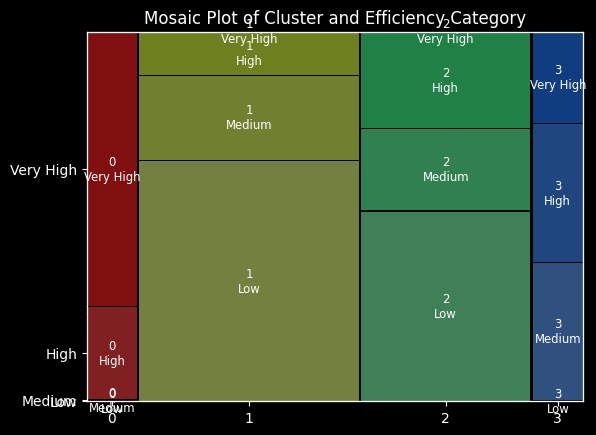

In [ ]:
# Defining bins and labels for 'Efficiency_WhKm'
efficiency_bins = [0, 175, 190, 205, 220]  # Example bins
efficiency_labels = ['Low', 'Medium', 'High', 'Very High']  # Example labels

# Creating a categorical variable for 'Efficiency_WhKm'
data1['Efficiency_Category'] = pd.cut(data1['Efficiency_WhKm'], bins=efficiency_bins, labels=efficiency_labels)

# Crosstabulation of Cluster and Efficiency_Category
efficiency_crosstab = pd.crosstab(data1['Cluster'], data1['Efficiency_Category'])

# Plotting the mosaic plot
# Creating a dictionary from the crosstab for mosaic plot
efficiency_crosstab_dict = efficiency_crosstab.stack().reset_index().set_index(['Cluster', 'Efficiency_Category']).to_dict()[0]

plt.figure(figsize=(10, 6))
mosaic(efficiency_crosstab_dict, title='Mosaic Plot of Cluster and Efficiency Category')
plt.show()

**Parallel box-and-whisker plot of TopSpeed per KmH by segment**

A parallel box-and-whisker plot is a graphical representation that displays the distribution of a continuous variable (TopSpeed in KmH) across different categories (segments).

<Figure size 1200x800 with 0 Axes>

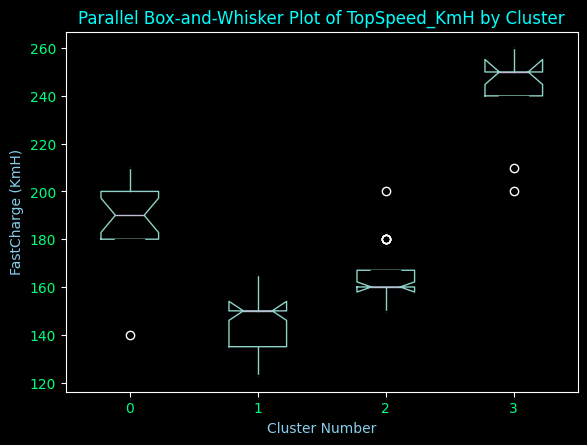

In [ ]:
# Create the box plot
plt.figure(figsize=(12, 8))
data1.boxplot(column='TopSpeed_KmH', by='Cluster', notch=True, grid=False)

# Set the labels and title
plt.xlabel('Cluster Number', color = 'skyblue')
plt.xticks(color = 'springgreen')
plt.ylabel('FastCharge (KmH)', color = 'skyblue')
plt.yticks(color = 'springgreen')
plt.title('Parallel Box-and-Whisker Plot of TopSpeed_KmH by Cluster', color = 'cyan')
plt.suptitle('')

# Show the plot
plt.show()

**Conditional inference tree using segment membership as dependent variable**

The tree is built by recursively partitioning the data into subsets based on the significant predictors, using statistical tests to determine the splits. Each node in the tree represents a subset of the data, and the leaf nodes represent the predicted segment membership.

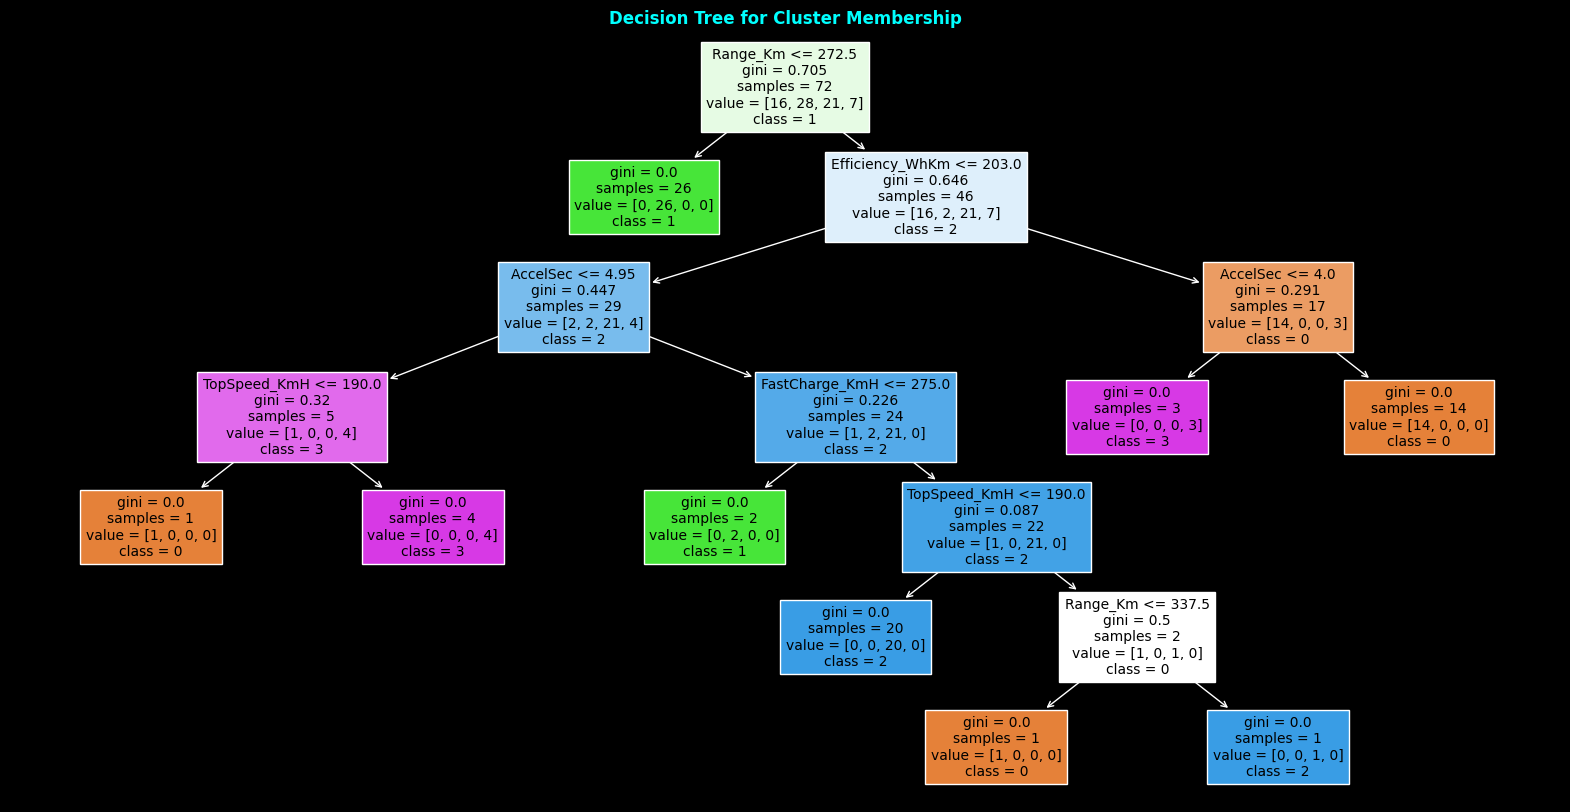

In [ ]:
'''
A conditional inference tree (CIT) is a type of decision tree that uses statistical tests
to determine the relationships between variables. In this case, the CIT uses segment membership
as the dependent variable, and the tree is built to predict the segment membership based on other variables.
'''
# Features and target variable
X = data1[numeric_cols]  # Features (dropping the target variable)
y = data1['Cluster']  # Target variable
# Split data into training and testing sets
# This code splits the data into training and testing sets using the train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train and y_train are the training sets for features and target, respectively
# X_test and y_test are the testing sets for features and target, respectively

# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Visualizing the decision tree
plt.figure(figsize=(20, 10))
tree = plot_tree(clf, feature_names=X.columns, class_names=[str(i) for i in clf.classes_], filled=True, fontsize=10)
plt.title('Decision Tree for Cluster Membership', color='cyan', weight='bold')

# Changing text color to black
for item in tree:
    if isinstance(item, plt.Text):
        item.set_color('black')

plt.show()

**simple segment evaluation plot for the EV data set**

In [ ]:
# Cluster means of Price(Inr), TopSpeed_KmH, Range_Km

numeric_cols = ['Price(Inr)', 'TopSpeed_KmH', 'Range_Km']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data1[numeric_cols])
i = 4
kmeans = KMeans(n_clusters = i, random_state = 42)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_
data1['Cluster'] = cluster_labels
cluster_means = data1.groupby('Cluster')[numeric_cols].mean()
print(" Cluster means of Price(Inr), TopSpeed_KmH, Range_Km ------->")
print("----------------------------------------------------------------")
print(cluster_means)
print("----------------------------------------------------------------")

 Cluster means of Price(Inr), TopSpeed_KmH, Range_Km ------->
----------------------------------------------------------------
           Price(Inr)  TopSpeed_KmH    Range_Km
Cluster                                        
0        2.799788e+06    144.515152  210.000000
1        5.702435e+06    191.538462  371.923077
2        3.669430e+06    157.391304  358.043478
3        1.196494e+07    238.750000  443.750000
----------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**A simple segment evaluation plot for the EV (Electric Vehicle) data set plotting Cluster Centroids with Bubble Size Representing Percentage of Price (Inr)**

--------------------------------------------------------------------------------
----------Displaying Percentage of Price (Inr) Cluster
0    21.957934
1    35.235962
2    20.057593
3    22.748510
Name: Price(Inr), dtype: float64------------
--------------------------------------------------------------------------------


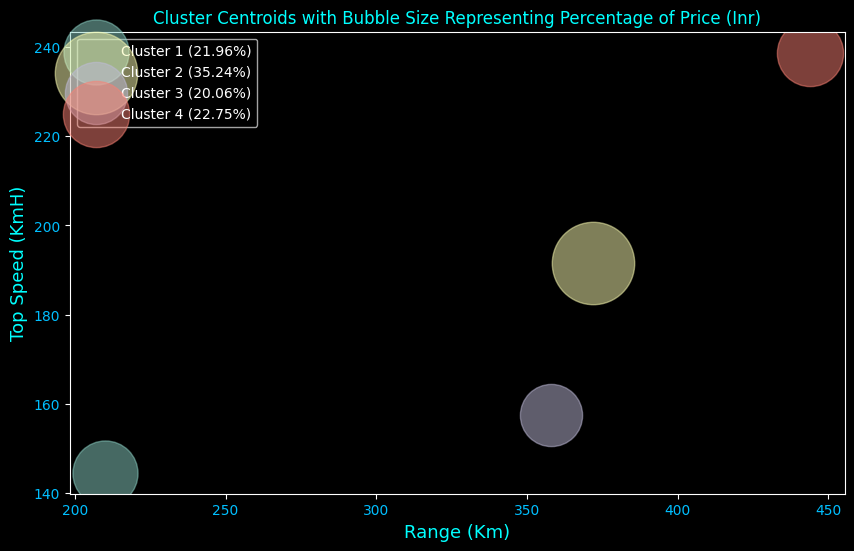

'\nThis plot can help us understand:\n- Which segments have the highest price percentage and what are their characteristic features?\n- How do the features of each segment relate to the price percentage?\n- Are there any segments with similar features but different price percentages?\n'

In [ ]:
'''- Identifying the characteristic features of each segment (cluster centroid)
- To See the relative price percentage for each segment (bubble size)
- To Visualize the relationships between features and price percentage across segments'''

# Calculate the total Price(Inr) for each cluster
cluster_total_price = data1.groupby('Cluster')['Price(Inr)'].sum()

# Calculate the total Price(Inr) for all data
total_price = data1['Price(Inr)'].sum()

# Calculate the percentage of Price(Inr) for each cluster
cluster_percentage = (cluster_total_price / total_price) * 100
print("--------------------------------------------------------------------------------")
print(f'----------Displaying Percentage of Price (Inr) {cluster_percentage}------------')
print("--------------------------------------------------------------------------------")
# Create a bubble plot
plt.figure(figsize=(10, 6))

# Scatter plot for each cluster
for cluster in range(i):
    plt.scatter(cluster_means.loc[cluster, 'Range_Km'],
                cluster_means.loc[cluster, 'TopSpeed_KmH'],
                s=cluster_percentage[cluster] * 100,  # Bubble size proportional to percentage of Price(Inr)
                alpha=0.5,
                label=f'Cluster {cluster+1} ({cluster_percentage[cluster]:.2f}%)')

# Add labels and legend
plt.xlabel('Range (Km)', color = 'cyan', fontsize = 13)
plt.xticks(color = 'deepskyblue')
plt.ylabel('Top Speed (KmH)', color = 'cyan', fontsize = 13)
plt.yticks(color = 'deepskyblue')
plt.title('Cluster Centroids with Bubble Size Representing Percentage of Price (Inr)', color = 'aqua')
plt.legend()
plt.show()

'''
This plot can help us understand:
- Which segments have the highest price percentage and what are their characteristic features?
- How do the features of each segment relate to the price percentage?
- Are there any segments with similar features but different price percentages?
'''